# Flow fields

Resources: 
- https://www.geeksforgeeks.org/how-to-plot-a-simple-vector-field-in-matplotlib/
- https://tylerxhobbs.com/essays/2020/flow-fields
- https://medium.com/@bit101/flow-fields-part-i-3ebebc688fd8

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

## basic vector field

In [2]:
np.linspace(-5, 5, 11)

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [3]:
# meshgrid
x, y = np.meshgrid(np.linspace(-5, 5, 10), 
                   np.linspace(-5, 5, 10))
# the non int value help us avoid div by 0 below
x

array([[-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ],
       [-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778

In [4]:
# directional vectors
u = -y / np.sqrt(x**2 + y**2)
v = x / (x**2 + y**2)
u

array([[ 0.70710678,  0.78935222,  0.87415728,  0.9486833 ,  0.99388373,
         0.99388373,  0.9486833 ,  0.87415728,  0.78935222,  0.70710678],
       [ 0.61394061,  0.70710678,  0.81373347,  0.91914503,  0.98994949,
         0.98994949,  0.91914503,  0.81373347,  0.70710678,  0.61394061],
       [ 0.48564293,  0.58123819,  0.70710678,  0.85749293,  0.98058068,
         0.98058068,  0.85749293,  0.70710678,  0.58123819,  0.48564293],
       [ 0.31622777,  0.3939193 ,  0.51449576,  0.70710678,  0.9486833 ,
         0.9486833 ,  0.70710678,  0.51449576,  0.3939193 ,  0.31622777],
       [ 0.11043153,  0.14142136,  0.19611614,  0.31622777,  0.70710678,
         0.70710678,  0.31622777,  0.19611614,  0.14142136,  0.11043153],
       [-0.11043153, -0.14142136, -0.19611614, -0.31622777, -0.70710678,
        -0.70710678, -0.31622777, -0.19611614, -0.14142136, -0.11043153],
       [-0.31622777, -0.3939193 , -0.51449576, -0.70710678, -0.9486833 ,
        -0.9486833 , -0.70710678, -0.51449576

In [5]:
v

array([[-0.1       , -0.09692308, -0.08490566, -0.06      , -0.02195122,
         0.02195122,  0.06      ,  0.08490566,  0.09692308,  0.1       ],
       [-0.12461538, -0.12857143, -0.12162162, -0.09310345, -0.036     ,
         0.036     ,  0.09310345,  0.12162162,  0.12857143,  0.12461538],
       [-0.15283019, -0.17027027, -0.18      , -0.15882353, -0.06923077,
         0.06923077,  0.15882353,  0.18      ,  0.17027027,  0.15283019],
       [-0.18      , -0.21724138, -0.26470588, -0.3       , -0.18      ,
         0.18      ,  0.3       ,  0.26470588,  0.21724138,  0.18      ],
       [-0.19756098, -0.252     , -0.34615385, -0.54      , -0.9       ,
         0.9       ,  0.54      ,  0.34615385,  0.252     ,  0.19756098],
       [-0.19756098, -0.252     , -0.34615385, -0.54      , -0.9       ,
         0.9       ,  0.54      ,  0.34615385,  0.252     ,  0.19756098],
       [-0.18      , -0.21724138, -0.26470588, -0.3       , -0.18      ,
         0.18      ,  0.3       ,  0.26470588

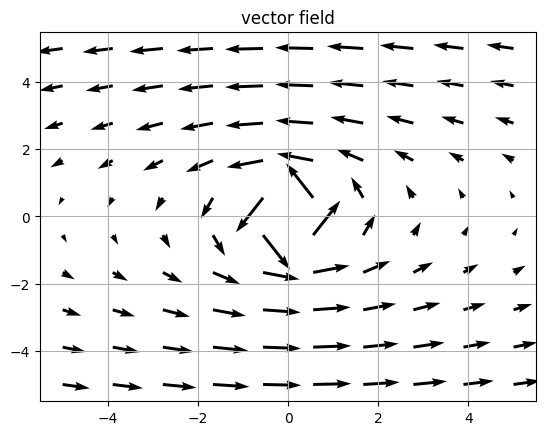

In [6]:
plt.quiver(x, y, u, v)
plt.title('vector field')
plt.grid()
plt.show()

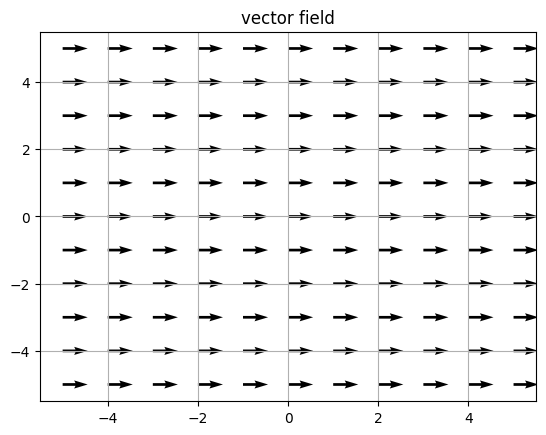

In [7]:
x = np.linspace(-5, 5, 11)
y = np.linspace(-5, 5, 11)
x, y = np.meshgrid(x, y)
u = np.ones(x.shape)
v = np.zeros(y.shape)
# v = np.ones(x.shape)

plt.quiver(x, y, u, v, angles='xy')
plt.title('vector field')
plt.grid()
plt.show()

## using radian angles

Pretty much follow Tyler Hobb's flow fields article

### params

In [8]:
width = 1000
height = 1000
extra_margin = 0.5
resolution_percent = 0.01

In [9]:
left_x = int(width * -1 * extra_margin)
right_x = int(width * (1 + extra_margin))
top_y = int(height * -1 * extra_margin)
bottom_y = int(height * (1 + extra_margin))
((left_x, top_y), (right_x, bottom_y))

((-500, -500), (1500, 1500))

In [10]:
resolution = int(width * resolution_percent)
resolution

10

In [11]:
num_columns = int((right_x - left_x) / resolution)
num_rows = int((bottom_y - top_y) / resolution)
(num_rows, num_columns)

(200, 200)

### flow field with `pi/4`

In [12]:
grid = np.ones((num_rows, num_columns)) * np.pi * 0.25
grid

array([[0.78539816, 0.78539816, 0.78539816, ..., 0.78539816, 0.78539816,
        0.78539816],
       [0.78539816, 0.78539816, 0.78539816, ..., 0.78539816, 0.78539816,
        0.78539816],
       [0.78539816, 0.78539816, 0.78539816, ..., 0.78539816, 0.78539816,
        0.78539816],
       ...,
       [0.78539816, 0.78539816, 0.78539816, ..., 0.78539816, 0.78539816,
        0.78539816],
       [0.78539816, 0.78539816, 0.78539816, ..., 0.78539816, 0.78539816,
        0.78539816],
       [0.78539816, 0.78539816, 0.78539816, ..., 0.78539816, 0.78539816,
        0.78539816]])

In [13]:
grid.shape

(200, 200)

In [14]:
np.cos(np.pi * .49)

0.031410759078128396

In [15]:
np.arange(100).reshape((10, 10))[::2, ::2]

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

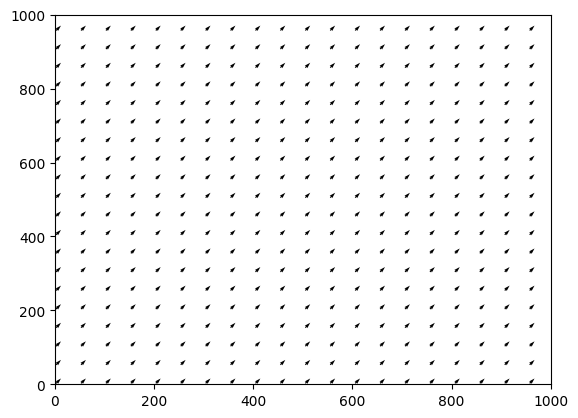

In [16]:
# plot
xs = np.linspace(left_x, right_x, grid.shape[1])
ys = np.linspace(top_y, bottom_y, grid.shape[0])
x, y = np.meshgrid(xs[::5], ys[::5])

u = np.cos(grid[::5, ::5])
v = np.sin(grid[::5, ::5])

plt.quiver(x, y, u, v)

plt.xlim(0, width)
plt.ylim(0, height)

# plt.grid()
plt.show()

In [17]:
# plot func
def plot_flow_field(xy: tuple[tuple[int, int]], grid: np.array, xbounds: tuple = None, ybounds: tuple = None, density: int = 1, show_grid: bool = True):
    xs = np.linspace(xy[0][0], xy[1][0], grid.shape[1])
    ys = np.linspace(xy[0][1], xy[1][1], grid.shape[0])
    x, y = np.meshgrid(xs[::density], ys[::density])

    u = np.cos(grid[::density, ::density])
    v = np.sin(grid[::density, ::density])

    plt.quiver(x, y, u, v)
    
    if xbounds is not None and ybounds is not None:
        plt.xlim(xbounds[0], xbounds[1])
        plt.ylim(ybounds[0], ybounds[1])

    if show_grid: plt.grid()
    plt.show()

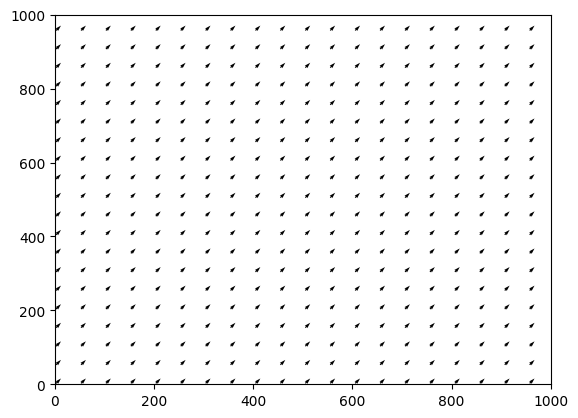

In [18]:
plot_flow_field(xy=((left_x, top_y), (right_x, bottom_y)), grid=grid, xbounds=(0, width), ybounds=(0, height), density=5, show_grid=False)

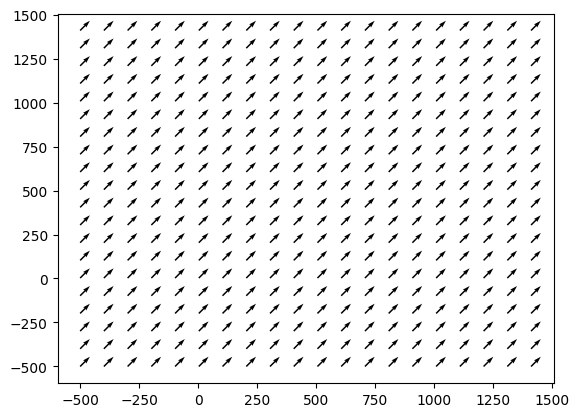

In [19]:
plot_flow_field(xy=((left_x, top_y), (right_x, bottom_y)), grid=grid, density=10, show_grid=False)

### flow field with curves

In [20]:
# add some flow to field
grid = np.ones((num_rows, num_columns)) * np.pi * np.linspace(0, 1, num_rows).reshape((num_rows, 1))

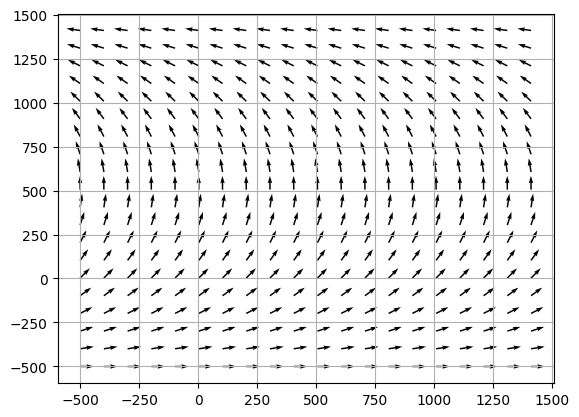

In [22]:
plot_flow_field(xy=((left_x, top_y), (right_x, bottom_y)), grid=grid, density=10, show_grid=True)

### drawing a curve through field

In [23]:
curve = []
x, y = 500, 100
num_steps = 180
step_length = width * 0.005  # 0.5% 

curve.append((x, y))
for n in range(num_steps):
    x_offset = x - left_x
    y_offset = y - top_y
    col_index = int(x_offset / resolution)
    row_index = int(y_offset / resolution)
    grid_angle = grid[row_index, col_index]
    
    x_step = step_length * np.cos(grid_angle)
    y_step = step_length * np.sin(grid_angle)
    
    x, y = x + x_step, y + y_step
    
    curve.append((x, y))

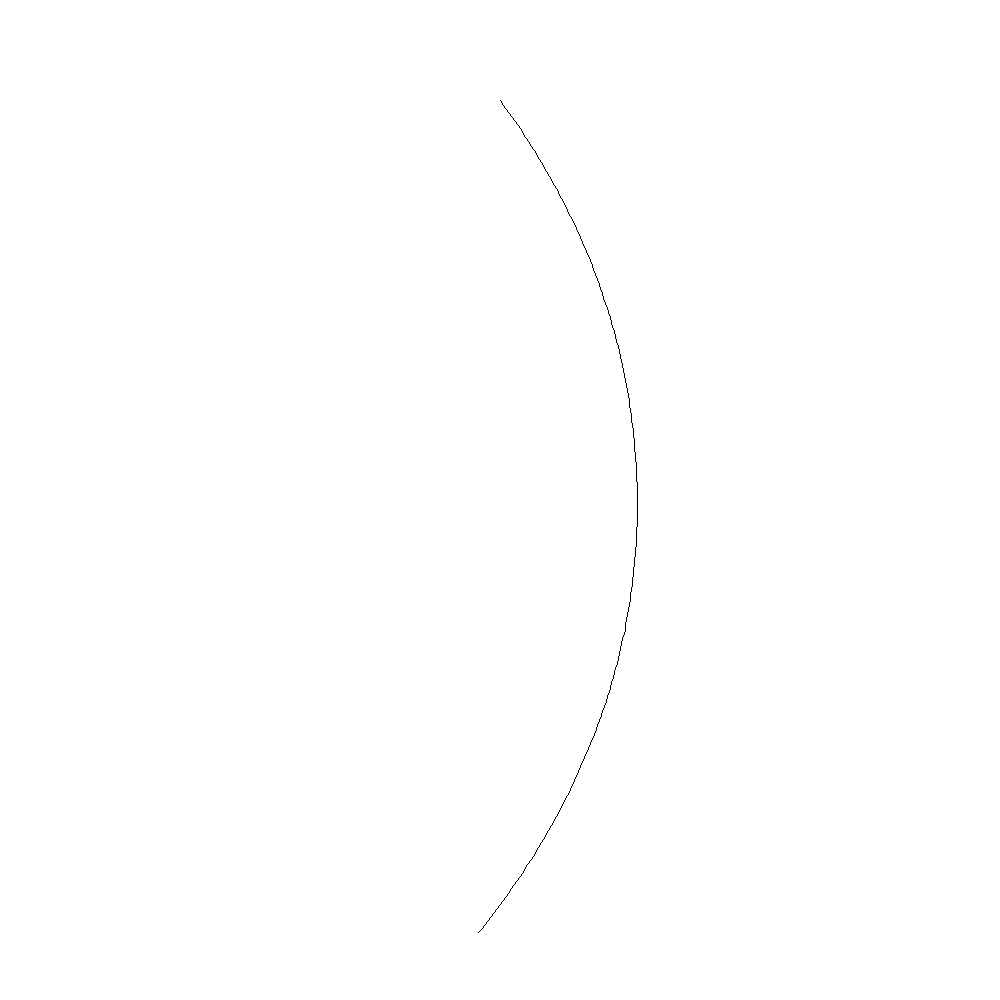

In [24]:
im = Image.new("L", (width, height), 255)

d = ImageDraw.Draw(im)

d.line(curve)

im

In [25]:
def gen_curve(grid: np.array, xy: tuple, num_steps: int, step_len: int) -> list[tuple]:
    x, y = xy[0], xy[1]
    curve = []
    curve.append((x, y))
    for n in range(num_steps):
        x_offset = x - left_x
        y_offset = y - top_y
        col_index = int(x_offset / resolution)
        row_index = int(y_offset / resolution)
        # this could be cleaner
        try:
            grid_angle = grid[row_index, col_index]
        except IndexError:
            return curve

        x_step = step_length * np.cos(grid_angle)
        y_step = step_length * np.sin(grid_angle)

        x, y = x + x_step, y + y_step

        curve.append((x, y))
    return curve

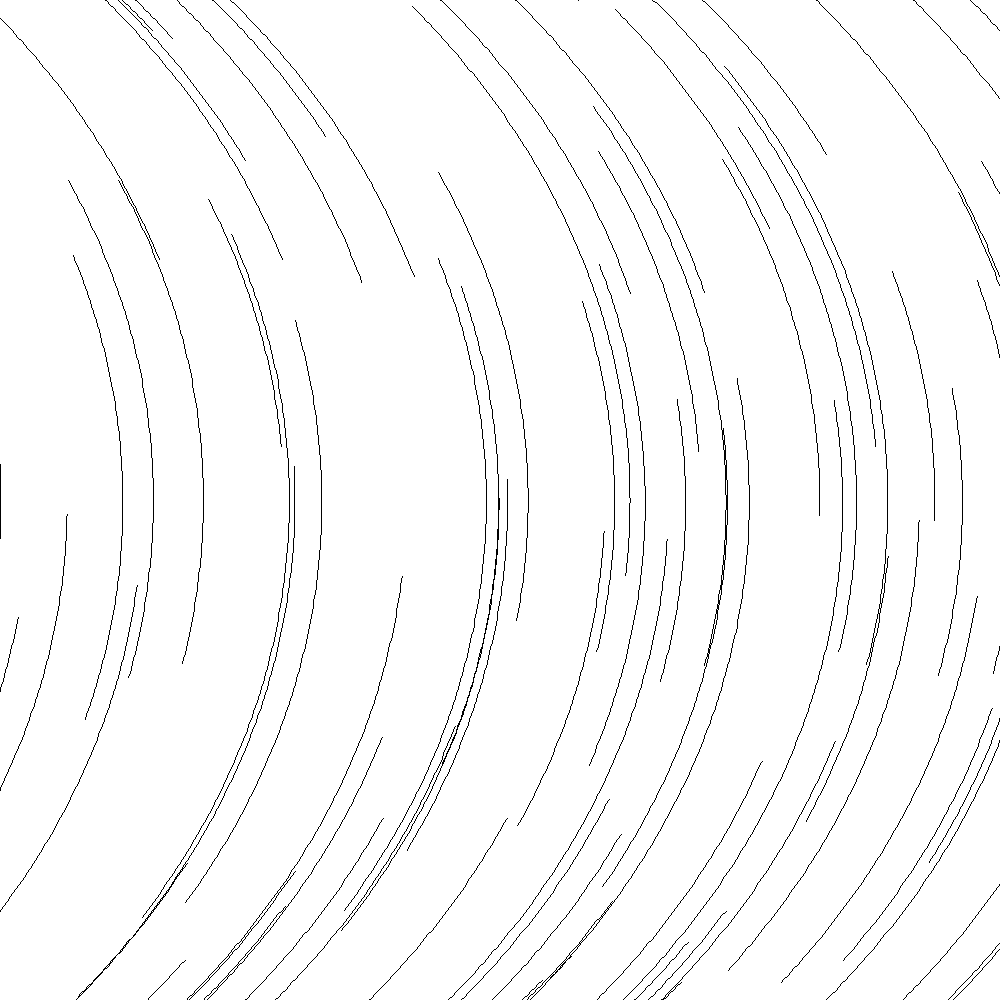

In [26]:
curves = []
step_len = width * 0.005
num_curves = 200

for i in range(num_curves):
    xy = (random.randrange(left_x, right_x), random.randrange(top_y, bottom_y))
    num_steps = random.randrange(50, 150)
    curves.append(gen_curve(grid, xy, num_steps, step_len))
    
im = Image.new("L", (width, height), 255)
d = ImageDraw.Draw(im)

for curve in curves:
    d.line(curve)

im

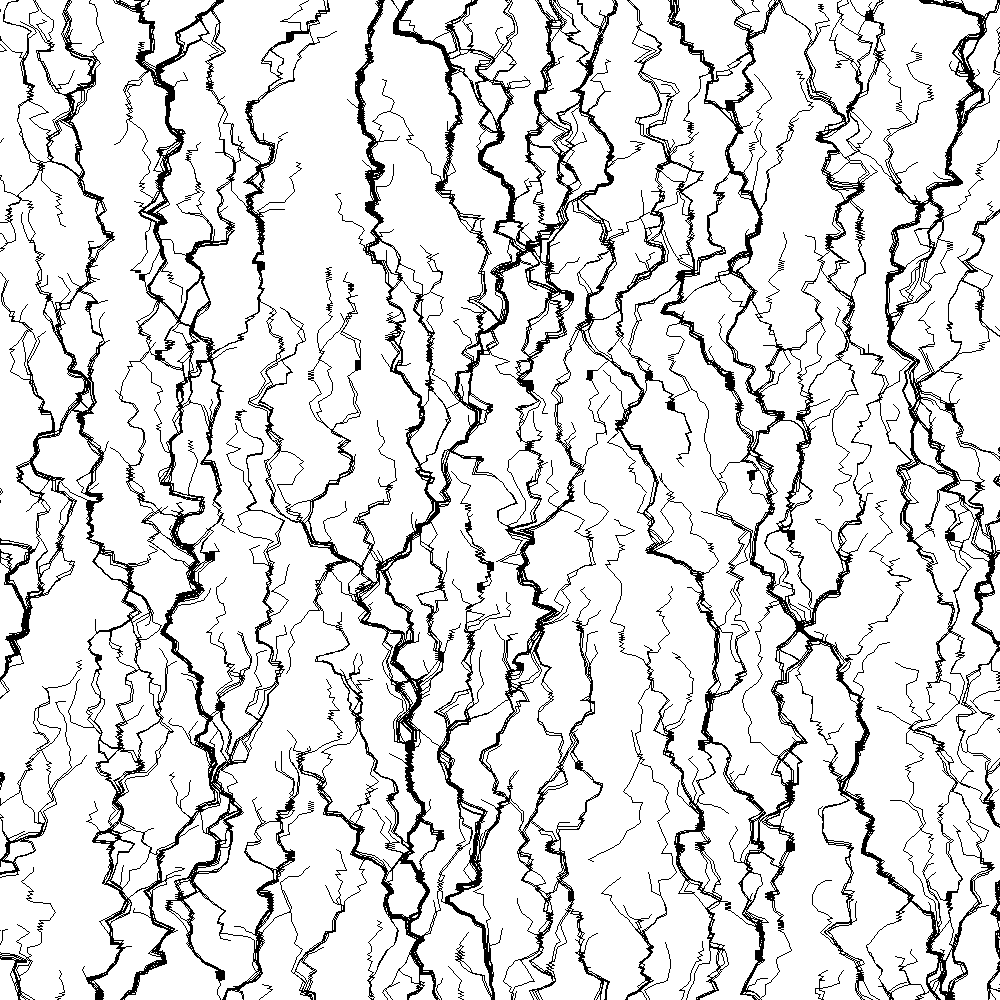

In [27]:
grid = np.random.rand(height, width) * np.pi

curves = []
step_len = width * 0.005
num_curves = 2000

for i in range(num_curves):
    xy = (random.randrange(left_x, right_x), random.randrange(top_y, bottom_y))
    num_steps = random.randrange(50, 150)
    curves.append(gen_curve(grid, xy, num_steps, step_len))
    
im = Image.new("L", (width, height), 255)
d = ImageDraw.Draw(im)

for curve in curves:
    d.line(curve)

im

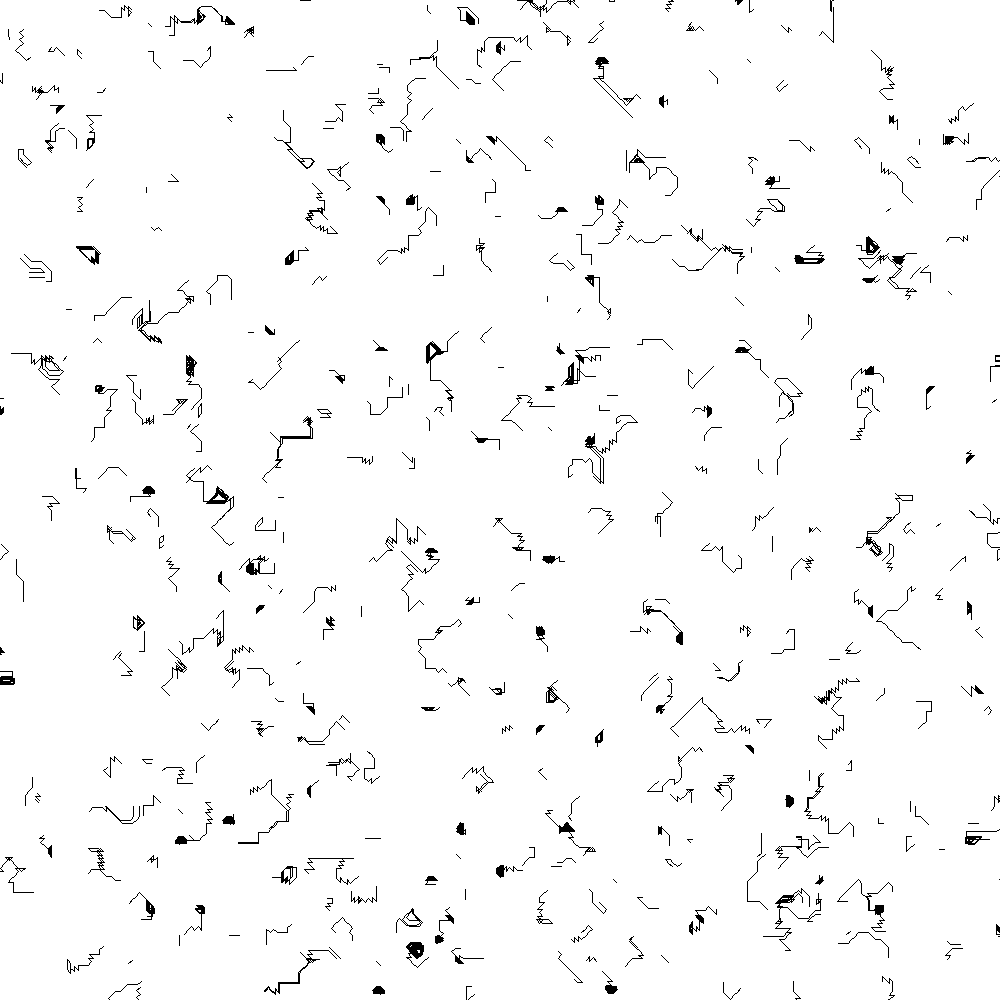

In [28]:
grid = np.random.randint(0, 8, size=(height, width)) * np.pi / 4

curves = []
step_len = width * 0.005
num_curves = 2000

for i in range(num_curves):
    xy = (random.randrange(left_x, right_x), random.randrange(top_y, bottom_y))
    num_steps = random.randrange(200, 500)
    curves.append(gen_curve(grid, xy, num_steps, step_len))
    
im = Image.new("L", (width, height), 255)
d = ImageDraw.Draw(im)

for curve in curves:
    d.line(curve)

im